In [1]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import os
from time import time

In [2]:
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print(tip + '正确率：%.2f%%' % (100*np.mean(acc)))

In [3]:
def save_image(im, i):
    im *= 15.9375
    im = 255 - im
    a = im.astype(np.uint8)
    output_path = '.\\HandWritten'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('\\%d.png' % i))

In [4]:
# 载入训练数据集和测试数据集
print('Load Training File Start...')
data = np.loadtxt('../dataset/optdigits.tra', dtype=np.float, delimiter=',')
x, y = np.split(data, (-1, ), axis=1)
images = x.reshape(-1, 8, 8)
y = y.ravel().astype(np.int)

print('Load Test Data Start...')
data = np.loadtxt('../dataset/optdigits.tes', dtype=np.float, delimiter=',')
x_test, y_test = np.split(data, (-1, ), axis=1)
print(y_test.shape)
images_test = x_test.reshape(-1, 8, 8)
y_test = y_test.ravel().astype(np.int)
print('Load Data OK...')


Load Training File Start...
Load Test Data Start...
(1797, 1)
Load Data OK...


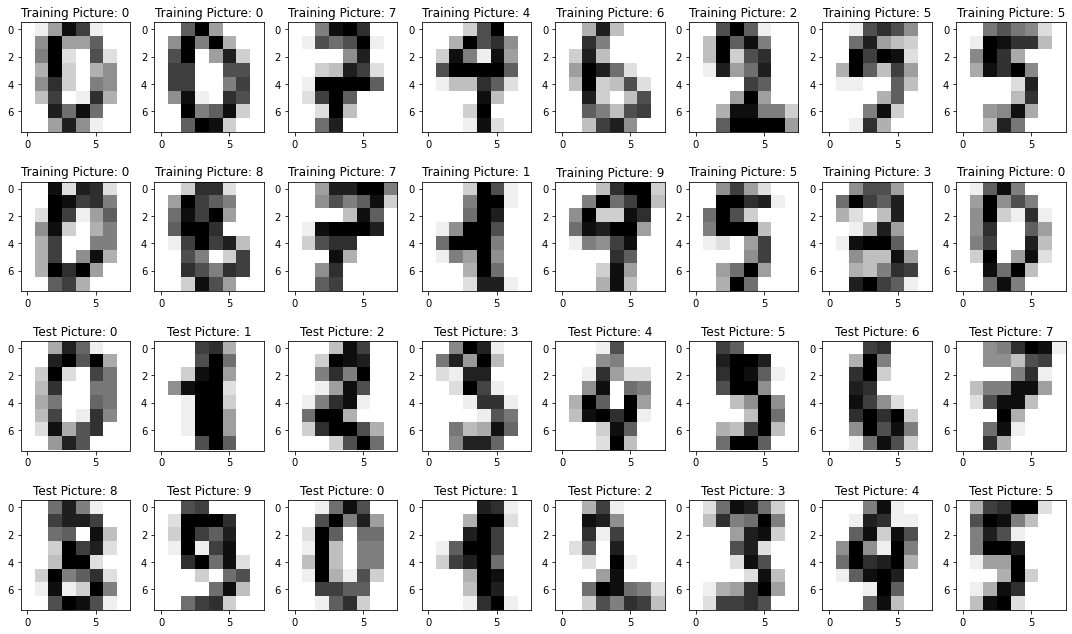

In [5]:
# 展示训练图片和测试图片
plt.figure(figsize=(15, 9), facecolor='w')
for index, image in enumerate(images[:16]):
    plt.subplot(4, 8, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training Picture: %i' % y[index])
for index, image in enumerate(images_test[:16]):
    plt.subplot(4, 8, index + 17)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    save_image(image.copy(), index)
    plt.title('Test Picture: %i' % y_test[index])
plt.tight_layout()
plt.show()

In [6]:
# 训练模型
print('Start Learning...')
model = svm.SVC(C=10, kernel='rbf', gamma=0.001)
t0 = time()
model.fit(x, y)
t1 = time()
t = t1 - t0
print('训练+CV耗时：%d分钟%.3f秒' % (int(t/60), t - 60*int(t/60)))
# print '最优参数：\t', model.best_params_
#clf.fit(x, y)
print('Learning is OK...')

Start Learning...
训练+CV耗时：0分钟0.192秒
Learning is OK...


In [7]:
# 得到训练数据的准确率和测试数据的准确率
print('训练集准确率：', accuracy_score(y, model.predict(x)))
y_hat = model.predict(x_test)
print('测试集准确率：', accuracy_score(y_test, model.predict(x_test)))
print(y_hat)
print(y_test)

训练集准确率： 1.0
测试集准确率： 0.9827490261547023
[0 1 2 ... 8 9 8]
[0 1 2 ... 8 9 8]


[9 1 1 1 1 9 5 9 9 9 9 9 9 8 1 0 1 3 8 9 9 3 5 9 1 7 3 5 8 5 1]
[5 2 2 2 8 7 7 5 7 7 7 7 7 1 8 6 8 9 9 3 8 8 8 7 8 3 9 9 3 3 8]


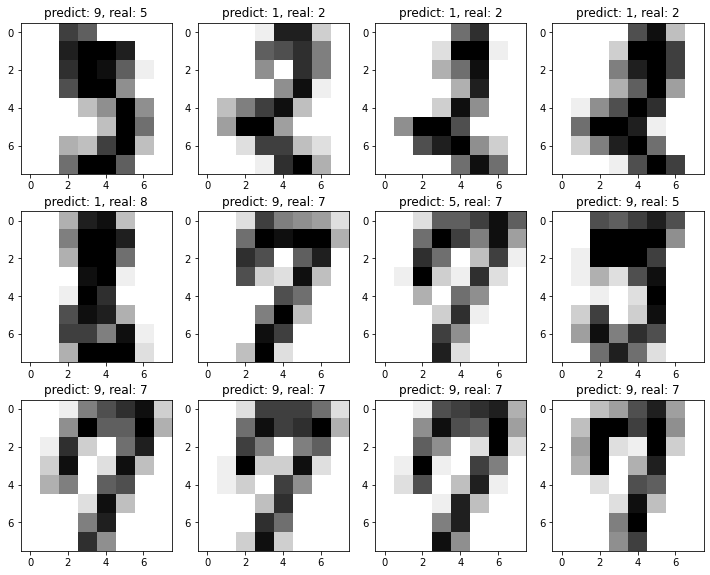

In [8]:
# 对画错的图进行展示
err_images = images_test[y_test != y_hat]
err_y_hat = y_hat[y_test != y_hat]
err_y = y_test[y_test != y_hat]
print(err_y_hat)
print(err_y)
plt.figure(figsize=(10, 8), facecolor='w')
for index, image in enumerate(err_images):
    if index >= 12:
        break
    plt.subplot(3, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('predict: %i, real: %i' % (err_y_hat[index], err_y[index]))
plt.tight_layout()
plt.show()